### Data Exploration and Discovery

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data/rainfall.csv')
df.head()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [3]:
df.tail()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
2634,Tashiyangtse,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,Tashiyangtse,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,Tashiyangtse,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,Tashiyangtse,2021,11,20.050000,6.266667,75.666667,0.328333,9.0
2638,Tashiyangtse,2021,12,16.854839,1.935484,74.483871,0.321290,21.0


In [4]:
df.shape

(2639, 8)

In [5]:
df.columns

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed',
       'Rainfall'],
      dtype='object')

In [6]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

In [7]:
df.describe()

,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
count,2639.000000,2639.000000,2638.000000,2638.000000,2637.000000,2632.000000,2638.000000
mean,2010.498295,6.498674,21.468284,10.279984,72.616870,0.824214,99.919894
std,6.346088,3.453457,5.040461,7.010512,9.919349,0.427144,160.770207
min,2000.000000,1.000000,7.300000,-70.774194,36.000000,0.003226,0.000000
25%,2005.000000,3.500000,17.900000,5.596774,66.225806,0.525572,7.900000
50%,2010.000000,6.000000,21.967742,11.303226,73.000000,0.793333,51.000000
75%,2016.000000,9.500000,25.100000,15.642204,79.741935,1.090000,129.900000
max,2021.000000,12.000000,34.354839,24.033333,98.967742,4.470000,2125.900000


### Handle Missing Value

In [8]:
df.isnull().sum()

location      0
Year          0
Month         0
Tmax          1
Tmin          1
RH            2
Wind Speed    7
Rainfall      1
dtype: int64

In [9]:
# df = df.dropna()
df[['Tmax','Tmin','RH','Wind Speed','Rainfall']]=df[['Tmax','Tmin','RH','Wind Speed','Rainfall']].fillna(df[['Tmax','Tmin','RH','Wind Speed','Rainfall']].mean())
df.isnull().sum()

location      0
Year          0
Month         0
Tmax          0
Tmin          0
RH            0
Wind Speed    0
Rainfall      0
dtype: int64

#### Label encoding location 

In [10]:
df['location'].value_counts()

Paro            264
Pemagatshel     264
Punakha         264
simkotha        264
Chamkhar        264
Haa             264
Kanglung        264
Mongar          264
Tashiyangtse    264
Deothang        263
Name: location, dtype: int64

In [11]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
df.head()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,5,2000,1,9.5,-0.4,65.0,0.26,0.0
1,5,2000,2,10.6,2.0,65.0,0.52,0.0
2,5,2000,3,14.5,4.0,69.0,0.52,11.0
3,5,2000,4,19.6,8.7,77.0,0.42,23.4
4,5,2000,5,22.5,10.2,77.0,0.24,98.4


In [12]:
df.location.unique()

array([5, 6, 7, 9, 0, 1, 2, 3, 4, 8])

### Visualization

In [13]:
import matplotlib.pyplot as plt

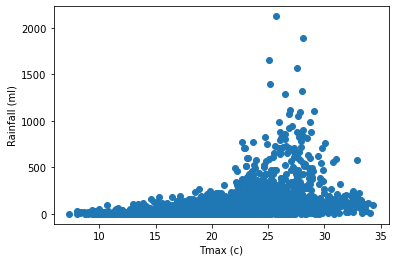

In [14]:
x = df.Tmax
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmax (c)')
plt.ylabel('Rainfall (ml)')
plt.show()

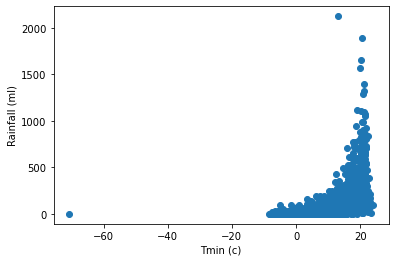

In [15]:
x = df.Tmin
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmin (c)')
plt.ylabel('Rainfall (ml)')
plt.show()

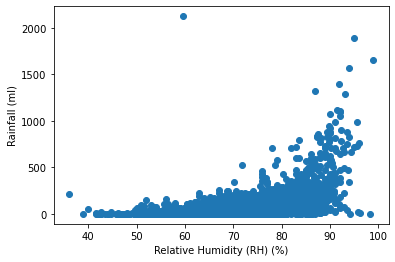

In [16]:
x = df.RH
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Relative Humidity (RH) (%)')
plt.ylabel('Rainfall (ml)')
plt.show()

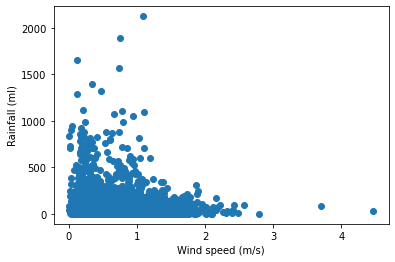

In [17]:
x = df['Wind Speed']
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rainfall (ml)')
plt.show()

### Removing Outliers

In [18]:
import seaborn as sns

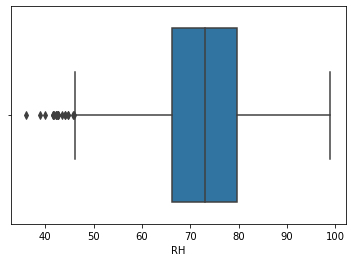

In [19]:
#finding outliers
sns.boxplot(x=df.RH)
plt.show()

In [20]:
#removing outliers
Q1 = df.RH.quantile(0.25)
Q3 = df.RH.quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df2=df[(df.RH> lowerlimit)  & (df.RH < upperlimit)]
df2.shape

(2620, 8)

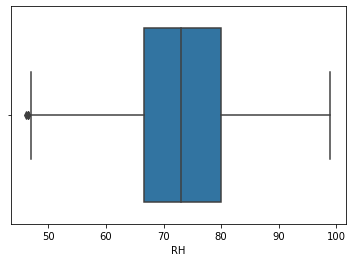

In [21]:
#after removing outliers from RH
sns.boxplot(x=df2.RH)
plt.show()

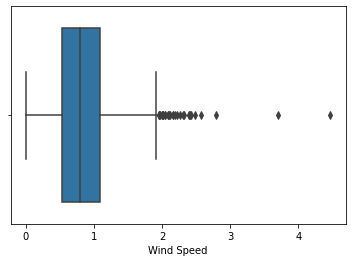

In [22]:
#finding outliers
sns.boxplot(x=df2['Wind Speed'])
plt.show()

In [23]:
#removing outliers
Q1 = df2['Wind Speed'].quantile(0.25)
Q3 = df2['Wind Speed'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df3=df2[(df2['Wind Speed']> lowerlimit) & (df2['Wind Speed'] < upperlimit)]
df3.shape

(2590, 8)

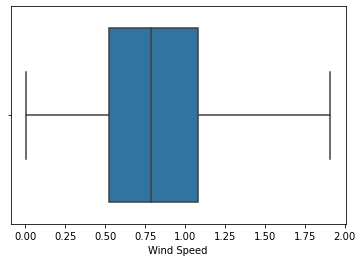

In [24]:
#after removing outliers from Wind Speed
sns.boxplot(x=df3['Wind Speed'])
plt.show()

In [25]:
# df3['Rainfall'].max()

In [26]:
# df3['Rainfall'].mean()

### Heatmap

In [27]:
df3.corr()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
location,1.000000,-0.007662,0.004582,0.174478,0.047520,-0.065942,-0.151575,-0.167665
Year,-0.007662,1.000000,-0.003955,0.067720,-0.033117,-0.153126,-0.159512,-0.002129
Month,0.004582,-0.003955,1.000000,0.206018,0.197137,0.125817,-0.248115,0.041607
Tmax,0.174478,0.067720,0.206018,1.000000,0.858437,0.356392,-0.255107,0.400836
Tmin,0.047520,-0.033117,0.197137,0.858437,1.000000,0.521202,-0.284667,0.509366
RH,-0.065942,-0.153126,0.125817,0.356392,0.521202,1.000000,-0.314941,0.510174
Wind Speed,-0.151575,-0.159512,-0.248115,-0.255107,-0.284667,-0.314941,1.000000,-0.224137
Rainfall,-0.167665,-0.002129,0.041607,0.400836,0.509366,0.510174,-0.224137,1.000000


<AxesSubplot:>

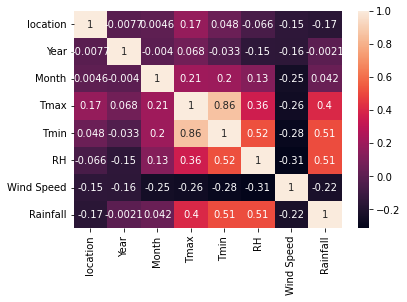

In [28]:
sns.heatmap(df3.corr(), annot=True)

### Feature Engineering 

#### Feature Scaling 

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(df3)
final_df=pd.DataFrame(data=scaled_data,columns=df3.columns)
final_df.head()

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,0.174976,-1.648847,-1.603338,-2.378979,-1.540609,-0.815043,-1.387232,-0.624846
1,0.174976,-1.648847,-1.312780,-2.160757,-1.196736,-0.815043,-0.727820,-0.624846
2,0.174976,-1.648847,-1.022223,-1.387059,-0.910176,-0.400055,-0.727820,-0.556885
3,0.174976,-1.648847,-0.731666,-0.375301,-0.236758,0.429922,-0.981440,-0.480274
4,0.174976,-1.648847,-0.441109,0.200013,-0.021838,0.429922,-1.437956,-0.016902


### Model Training and Testing

#### Splitting Data 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = final_df[['location', 'Year', 'Month', 'Tmax', 'Tmin','RH', 'Wind Speed']]
y = final_df['Rainfall']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [34]:
len(x_train)

2072

In [35]:
len(x_test)

518

### Random Forest Algorithm

In [36]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=10)
model_random.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [37]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [38]:
y_train_predicted = model_random.predict(x_train)
y_test_predicted = model_random.predict(x_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy: ",r2_score(y_test,y_test_predicted))

print("MSE: ",mean_squared_error(y_test,y_test_predicted))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted)))  

Train set accuracy:  0.953368391458904
Test set accuracy:  0.5319701826071788
MSE:  0.605106883991352
RMSE:  0.7778861639027603


### Decision Tree Algorithm

In [39]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(max_depth=5)
model_decision.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [40]:
y_train_predicted = model_decision.predict(x_train)
y_test_predicted = model_decision.predict(x_test)
print("Train set accuracy: ",r2_score(y_train,y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,y_test_predicted))
print("MSE:",mean_squared_error(y_test,y_test_predicted))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_test_predicted))) 

Train set accuracy:  0.7753034839843185
Test set accuracy :  0.4473627280061374
MSE: 0.7144942591403721
RMSE:  0.8452776225243231


### KNN Algorithm

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
model_KNNR = KNeighborsRegressor(10)
model_KNNR.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [43]:
y_train_predicted = model_KNNR.predict(x_train)
y_test_predicted = model_KNNR.predict(x_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

print("MSE:",mean_squared_error(y_test,y_test_predicted))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

Train set accuracy:  0.7598821335937477
Test set accuracy :  0.5832601644309277
MSE: 0.5387950381900981
RMSE:  0.7340265922908367


### SVM

In [44]:
from sklearn import svm
model_svm = svm.SVR(kernel='rbf',C=5000,gamma='scale')

In [45]:
model_svm.fit(x_train,y_train)

SVR(C=5000)

In [46]:
y_train_predicted = model_svm.predict(x_train)
y_test_predicted = model_svm.predict(x_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

print("MSE:",mean_squared_error(y_test,y_test_predicted))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

Train set accuracy:  0.9128081867383407
Test set accuracy :  0.3728282128882501
MSE: 0.8108585216654182
RMSE:  0.900476830165784


### Using  Pipeline

In [47]:
x = final_df.drop('Rainfall',axis=1)
y = final_df['Rainfall']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, shuffle=True, random_state=50)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [50]:
numeric_col = x.select_dtypes(include=['int64','float64']).columns
numeric_col

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed'], dtype='object')

In [51]:
categorical_col = x.select_dtypes(include=['object']).columns
categorical_col

Index([], dtype='object')

In [52]:
numeric_index = [x.columns.get_loc(col) for col in numeric_col]
numeric_index

[0, 1, 2, 3, 4, 5, 6]

In [53]:
categorical_index = [x.columns.get_loc(col) for col in categorical_col]
categorical_index

[]

In [54]:
#Building the Numeric Transformation Pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
] )

In [55]:
#Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('le',OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [('num',numeric_transformer,numeric_index),
                ('label',categorical_transformer,categorical_index)]
)

### RANDOM FOREST

In [57]:
model_random_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_random)
])
from sklearn import set_config
set_config(display='diagram')
model_random_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('label',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('le',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', RandomForestRegressor(n_estimators=10))])

In [58]:
print('Test Set Accuracy: ', model_random_pipeline.score(x_train,y_train))
print('Test Set Accuracy: ', model_random_pipeline.score(x_test,y_test))
y_pred = model_random_pipeline.predict(x_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))  

Test Set Accuracy:  0.9305526950999825
Test Set Accuracy:  0.7058332874454853
MSE: 0.27635530995828034
RMSE:  0.5256950731729186


### DECISION TREE

In [59]:
model_decision_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_decision)
])

set_config(display='diagram')
model_decision_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('label',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('le',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', DecisionTreeRegressor(max_depth=5))])

In [60]:
print('Test Set Accuracy: ', model_decision_pipeline.score(x_train,y_train))
print('Test Set Accuracy: ', model_decision_pipeline.score(x_test,y_test))
y_pred = model_decision_pipeline.predict(x_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))  

Test Set Accuracy:  0.7235631156455713
Test Set Accuracy:  0.6497181420819612
MSE: 0.3290727580190184
RMSE:  0.5736486363785923


### KNN

In [61]:
#Assemble the individual blocks to form the main pipeline
model_KNNR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_KNNR)
])


set_config(display='diagram')
model_KNNR_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('label',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('le',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', KNeighborsRegressor(n_neighbors=10))])

In [62]:
print('Test Set Accuracy: ', model_KNNR_pipeline.score(x_train,y_train))
print('Test Set Accuracy: ', model_KNNR_pipeline.score(x_test,y_test))
y_pred = model_KNNR_pipeline.predict(x_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))  

Test Set Accuracy:  0.7289642367005986
Test Set Accuracy:  0.7134379051742917
MSE: 0.26921114170311433
RMSE:  0.5188556077591475


### SVM

In [63]:
model_svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_svm)
])

set_config(display='diagram')
model_svm.fit(x_train, y_train)

SVR(C=5000)

In [64]:
print('Test Set Accuracy: ', model_svm_pipeline.score(x_train,y_train))
print('Test Set Accuracy: ', model_svm_pipeline.score(x_test,y_test))
y_pred = model_svm_pipeline.predict(x_test)
print("MSE:", mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))  

Test Set Accuracy:  0.9099885429512892
Test Set Accuracy:  0.4197057268322145
MSE: 0.5451582279166929
RMSE:  0.7383483107021326


Save model with best model to use

In [66]:
import pickle
pickle.dump(model_KNNR_pipeline, open('model.pkl', 'wb'))
pickled_model = pickle.load(open('model.pkl', 'rb'))
# pickled_model.predict(x_test)

array([-1.49858693e-01,  8.66964758e-01, -5.43786651e-01, -8.67412526e-02,
        5.43568192e-01,  4.33186811e-01, -5.65039978e-01, -3.09512674e-02,
       -1.84271785e-01, -5.07520071e-01,  7.65517188e-01,  8.70788408e-02,
       -6.20829964e-01, -1.33758062e-01, -5.93089428e-01, -4.97703477e-02,
       -2.11765188e-01,  6.25331721e-01, -2.29565564e-02, -5.61271220e-01,
        5.38526705e-01,  2.25559788e+00,  3.45084354e-01, -4.03230486e-01,
       -5.52930524e-01, -4.65952516e-01,  3.77520392e-01, -4.14536762e-01,
        7.05402398e-01, -2.90970904e-01, -4.94113175e-01, -5.93089428e-01,
        7.56435097e-01,  4.27502781e-01, -6.21015312e-01, -4.27449395e-01,
       -2.20600147e-01, -4.96399144e-01, -4.50988691e-01, -2.14236506e-01,
       -5.92409816e-01,  1.74995949e-01,  5.17396944e-01, -6.16505158e-01,
       -4.32392029e-01,  7.43028201e-01, -6.03716092e-01, -2.32153555e-01,
       -5.25560686e-01, -3.57634685e-01,  7.41730760e-01, -1.33795132e-01,
       -4.70079616e-01, -